# 이진분류 종합실습 : 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    #plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터 로딩

In [3]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_train_validation.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,20,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	| Single, Married, Divorced		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 2.데이터 전처리

### (1) 데이터 정리

In [4]:
target = 'Attrition'

In [5]:
# 불필요한 변수 제거
data.drop('EmployeeNumber', axis = 1, inplace = True)

In [6]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [7]:
dum_cols = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
            'JobRole', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
            'StockOptionLevel','WorkLifeBalance' ]

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7,11691,0,11,14,3,13,9,7,...,False,False,False,True,False,False,False,False,False,True
1,35,18,9362,2,11,10,2,2,2,2,...,False,False,True,False,False,False,False,False,True,False
2,42,6,13348,9,13,18,3,13,7,7,...,False,True,False,False,True,False,False,False,False,True
3,46,2,17048,8,23,28,2,26,15,9,...,False,False,False,False,False,False,False,False,True,False
4,39,20,4127,2,18,7,6,2,1,2,...,False,False,False,True,True,False,False,False,True,False


### (3) 데이터 분할
* train_test_split :
    * test_size : 0.# - 비율로 분할, 1보다 큰 자연수 - 갯수로 분할
    * train_size로 지정도 가능.

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 200, random_state = 2022)

### (4) 스케일링

In [9]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [10]:
y_train.value_counts() / len(y_train)

,count
Attrition,
0,0.839048
1,0.160952


## 4.모델링

### (1) 모델1
* 다양한 구조의 모델 2개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [24]:
# n
nfeatures = x_train.shape[1] #num of columns
nfeatures

53

In [25]:
clear_session()

model = Sequential(
    [Input(shape = (nfeatures,),),
     Dense(2, activation = 'relu'),
     Dense(1, activation = 'sigmoid')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.get_weights()

[array([[-0.32578045, -0.17863937],
        [-0.0260092 , -0.20301041],
        [ 0.19394535,  0.22158802],
        [-0.31286824, -0.1172954 ],
        [ 0.20241064,  0.3097359 ],
        [ 0.12053034,  0.32663912],
        [-0.21175644, -0.06025127],
        [ 0.32354146,  0.16483068],
        [ 0.22793162, -0.18830329],
        [-0.21137822, -0.13792564],
        [ 0.13254833,  0.1891644 ],
        [-0.05632785, -0.23035744],
        [ 0.2300244 ,  0.20591372],
        [ 0.24557889,  0.26114172],
        [ 0.13849899,  0.19209337],
        [-0.12272966, -0.2530667 ],
        [ 0.01018688,  0.0192053 ],
        [-0.16776432,  0.17675567],
        [-0.15234832, -0.05977312],
        [-0.015104  ,  0.18994582],
        [-0.28428194,  0.13826394],
        [-0.00701991, -0.31719765],
        [-0.12898847,  0.27401602],
        [-0.0169003 , -0.29164213],
        [-0.05758214, -0.10933636],
        [ 0.16808373,  0.04231152],
        [ 0.26105118,  0.079395  ],
        [ 0.30123627,  0.310

In [27]:
# 컴파일 + 학습
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy' ,metrics= ['Accuracy']) #
# 오차계산방법
# y - y^ 오차가 작으면 err(가중치?) 를 작게 , 오차가 크면 err(가중치?) 를 크게
history = model.fit(x_train, y_train,
                    epochs = 100, validation_split=0.2 , verbose = False).history


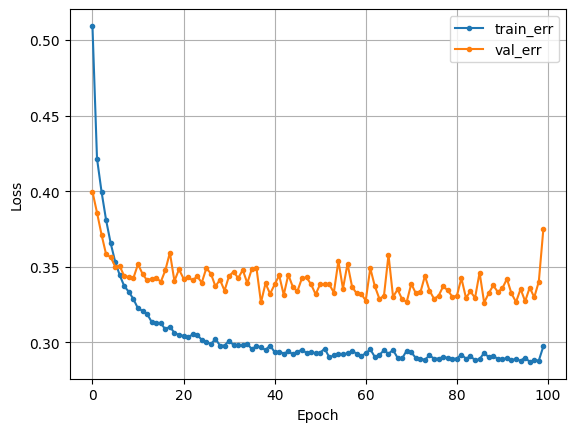

In [28]:
dl_history_plot(history)

In [16]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)
print(classification_report(y_val, pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       169
           1       0.71      0.55      0.62        31

    accuracy                           0.90       200
   macro avg       0.81      0.75      0.78       200
weighted avg       0.89      0.90      0.89       200



### (2) 모델2
* 다양한 구조의 모델 2개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [18]:
clear_session()
# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense(100, activation = 'relu'),
                     Dense(100, activation = 'relu'),
                     Dense( 1, activation= 'sigmoid')]) # 통과하면 0 ~1 사이 값으로 변환됨

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           5,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,601 (60.94 KB)

 Trainable params: 15,601 (60.94 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 컴파일 + 학습
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy') #
# 오차계산방법
# y - y^ 오차가 작으면 err(가중치?) 를 작게 , 오차가 크면 err(가중치?) 를 크게
history = model.fit(x_train, y_train,
                    epochs = 100, validation_split=0.2 , verbose = False).history

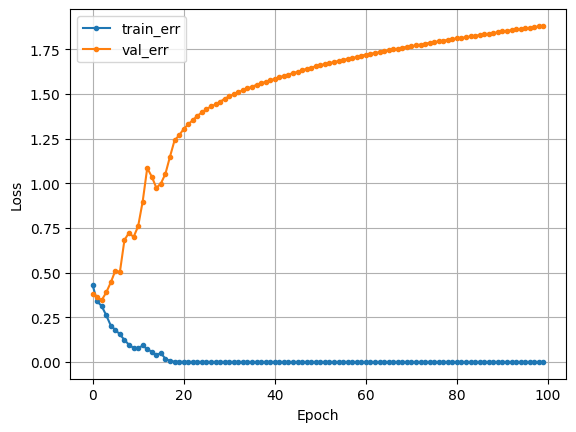

In [20]:
dl_history_plot(history)


In [21]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)
print(classification_report(y_val, pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       169
           1       0.67      0.58      0.62        31

    accuracy                           0.89       200
   macro avg       0.80      0.76      0.78       200
weighted avg       0.88      0.89      0.89       200



### (3) 모델3 : resampling